# Week 3 Assignment - Machine Learning CSU44061
### Ernests Kuznecovs
### 17332791


#### (i) 
#### (a)

The given code is used to plot the data with added labels.

Text(0.5, 0, 'y')

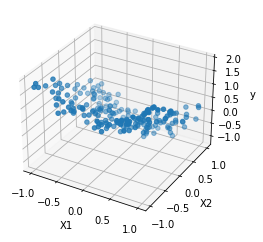

In [1]:
# id:20-20--20
import numpy as np
import pandas as pd
df = pd.read_csv("week3.csv", comment='#')
xy = df.to_numpy()
X = xy[:, 0:2]
y = xy[:, 2]

import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

The training data seems to lie on a curve as it sort of dips.

#### (b)

Polynomial features function generates the combinations of powers e.g   
X = \[a, b\]   
if q = 2   
Xpoly = \[1, a, b, a<sup>2</sup>, ab, b<sup>2</sup>\]


In [2]:
from sklearn.preprocessing import PolynomialFeatures
q = 5
Xpoly = PolynomialFeatures(q).fit_transform(X)

Lasso regression, where in sklearn alpha denotes the hyperparameter C.

Lasso regression is Linear regression with a square error + L1 penalty cost function.   
L1 penalty is the sum of the absolute values of the current parameters divided by 1/2C.    
C controls how much overall effect the L1 penalty will have over the cost function.  
L1 has the property of encouraging the parameters to be exactly zero.   
This is because in order for a parameter to be worth not being zero, it will have to "show its
worth" in the square error part of the cost function.    
   
C values of 0.01, 0.1, 1, and 10 were used.   
When C value is 0.01, it is relatively small, therefore it will have less effect over the overall cost function, this means that parameters are more likely to be non-zero because the cost of a parameter being non-zero is small (C is small).   
We see that theta 2 (X1), theta 3 (X2), and theta 4 (X1<sup>2</sup>) are parameters that the model deems impactful.   
   
For C = 0.1, we see that theta 3 (X2) is considered to be the only feature parameter that the model thinks is worth having.   
   
For C >= 1, the cost of having non-zero feature parameters no longer out values the cost of L1 penalty, therefore all theta values (except for theta 0) are 0.

In [3]:
from sklearn import linear_model 

def printThetas(intercept ,coef):
    print("theta", 0, ":", intercept)
    for i in range(len(coef)):
        print("theta", i+1, ":", coef[i])
        
C_range = [0.01, 0.1, 1, 10]
for C in C_range:
    model = linear_model.Lasso(alpha=C)
    model.fit(Xpoly, y)
    print("C=", C)
    printThetas(model.intercept_, model.coef_)
    print()

C= 0.01
theta 0 : 0.05115931340376115
theta 1 : 0.0
theta 2 : 0.008545856296340784
theta 3 : -0.9842098420589388
theta 4 : 0.874186152601582
theta 5 : -0.0
theta 6 : -0.0
theta 7 : 0.0
theta 8 : -0.0
theta 9 : 0.0
theta 10 : -0.0
theta 11 : 0.0
theta 12 : -0.0
theta 13 : 0.0
theta 14 : -0.0
theta 15 : -0.0
theta 16 : 0.0
theta 17 : -0.0
theta 18 : 0.0
theta 19 : 0.0
theta 20 : 0.0
theta 21 : -0.0

C= 0.1
theta 0 : 0.3405245877480857
theta 1 : 0.0
theta 2 : 0.0
theta 3 : -0.7081645420405625
theta 4 : 0.0
theta 5 : 0.0
theta 6 : -0.0
theta 7 : 0.0
theta 8 : -0.0
theta 9 : -0.0
theta 10 : -0.0
theta 11 : 0.0
theta 12 : 0.0
theta 13 : 0.0
theta 14 : 0.0
theta 15 : -0.0
theta 16 : 0.0
theta 17 : -0.0
theta 18 : -0.0
theta 19 : -0.0
theta 20 : -0.0
theta 21 : -0.0

C= 1
theta 0 : 0.27879266857828716
theta 1 : 0.0
theta 2 : 0.0
theta 3 : -0.0
theta 4 : 0.0
theta 5 : 0.0
theta 6 : -0.0
theta 7 : -0.0
theta 8 : -0.0
theta 9 : -0.0
theta 10 : -0.0
theta 11 : 0.0
theta 12 : 0.0
theta 13 : 0.0
the

#### (c)

Test values of X range from -2.5 to 2.5 as to make the real data points visible(in red).
The model predicts the y values of the poly transformed grid of values. This grid of 
values are plotted as a surface. The original data points are also plotted as a red scatter plot. This is repeated for different values of C.   
   
The function argument takes C as input.

In [4]:
def plotGrid(C, m="Lasso"):
    Xtest = []
    grid = np.linspace(-2.5,2.5)
    for i in grid:
        for j in grid:
            Xtest.append([i,j])
    Xtest = np.array(Xtest)
    Xtestpoly = PolynomialFeatures(q).fit_transform(Xtest)
    model = linear_model.Ridge(alpha=C)
    if (m == "Lasso"):
        model = linear_model.Lasso(alpha=C)
    model.fit(Xpoly, y)

    ytest = model.predict(Xtestpoly)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(Xtest[:,0], Xtest[:,1], ytest,
                    cmap='viridis', edgecolor='none')
    ax.scatter(X[:,0], X[:,1], y, color='r')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')

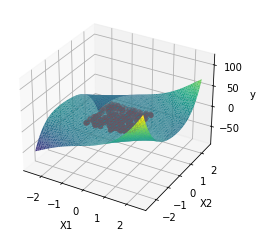

In [5]:
plotGrid(0.0001)

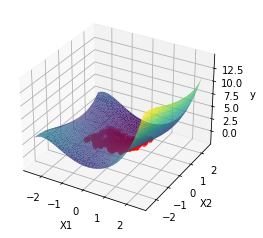

In [6]:
plotGrid(0.001)

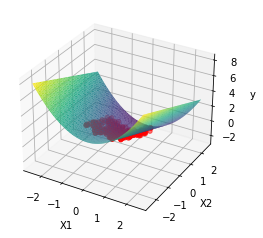

In [7]:
plotGrid(0.01)

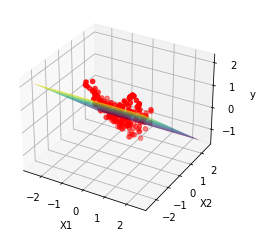

In [8]:
plotGrid(0.1)

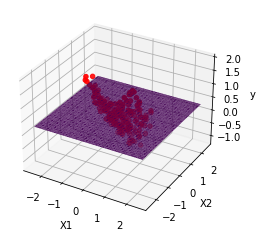

In [9]:
plotGrid(1)

With low values of C, the model ends up with more complexity/degrees of freedom represented by which parameter values are non-zero. We can see that the lowest C, has lots of curvy bits and points of inflection showing that the higher order feature parameters are at work.    
   
We can see for data points past the range of the training data, the curves can take off in any direction when the model uses many feature parameters.
  
Higher values of C, the number of higher order feature parameters are not in effect (since they are 0) and hence you see surface of predictions become a linear plane.

#### (d)

Under fitting is when the data forms a particular type of trend but the model lacks the feature parameters to be able fit to the trend. For example if there is a quadratic curve in the data, but the model has only access to linear features, then the model is not able to fit to the quadratic curve.   
   
Over fitting is when the model has plentry of feature parameters (maybe too many for its own good) and it fits to trends that don't really exist in reality (uses the extra features to fit to the noise of the training data). This sort of model would not perfrom well with fresh data as it would predict towards the noise of the data that it was trained on.   
   
The penalty parameter C can be used in such a way that it doen't overfit to the noise of the data even though there are many parameters available to the model.    
   
In part (b) we can see that the parameters are set to 0 when the model deems that they are not important. If C is too low, then real trends in the training data won't be considered and the model will effectively be under fitting. If C is too high, then the model will be over fitting.   

In part (c) we can directly see the effects of this, when C value is large it is underfitting and not capturing any trend in the data at all. When C value is low, there are more curves in the plane and aren't necessarily fitting to real trends in the data but maybe to noise.   
   
The C hyper parameter for L1 cost makes it so that there is a relatively high cost for a parameter to be non-zero.

#### (e)

Part b and c are repeated for ridge regression.

In [10]:
C_range = [0.01, 0.1, 1, 10]
for C in C_range:
    model = linear_model.Ridge(alpha=C)
    model.fit(Xpoly, y)
    print("C=", C)
    printThetas(model.intercept_, model.coef_)
    print()

C= 0.01
theta 0 : 0.02862947412691763
theta 1 : 0.0
theta 2 : 0.08604475183080466
theta 3 : -1.0560213674952734
theta 4 : 0.9830082535790811
theta 5 : 0.010046660757589298
theta 6 : -0.13637521748302486
theta 7 : 0.19269731403942103
theta 8 : 0.10235764079595257
theta 9 : -0.9408599905031695
theta 10 : 0.15429317143516644
theta 11 : -0.10213412456241586
theta 12 : -0.06272835173816688
theta 13 : 0.3759525932522012
theta 14 : -0.1709342678135894
theta 15 : 0.077264026643416
theta 16 : -0.19637744376352378
theta 17 : -0.17322489467627253
theta 18 : 0.5932442307933476
theta 19 : -0.21523529437220487
theta 20 : 0.7297050493343419
theta 21 : -0.0979597949406968

C= 0.1
theta 0 : 0.02684372529067547
theta 1 : 0.0
theta 2 : 0.049725622249217935
theta 3 : -1.0031265398761495
theta 4 : 0.9622229449078283
theta 5 : -0.06979963215217043
theta 6 : -0.05655301209055606
theta 7 : 0.1504455658663486
theta 8 : -0.03149009416172276
theta 9 : -0.5834196317038178
theta 10 : -0.018737748401144304
theta 11

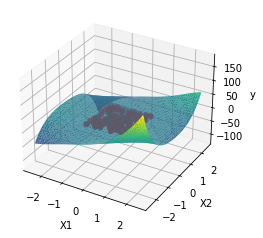

In [11]:
plotGrid(0.01, 'Ridge')

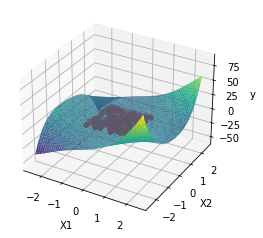

In [12]:
plotGrid(0.1, 'Ridge')

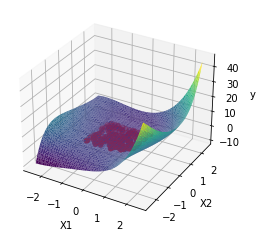

In [13]:
plotGrid(1, 'Ridge')

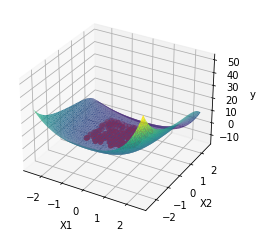

In [14]:
plotGrid(10, 'Ridge')

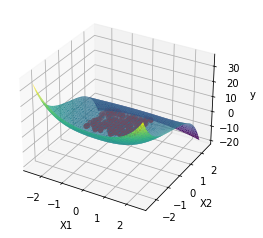

In [15]:
plotGrid(100, 'Ridge')

From looking at the model parameters and the shape of the surface, it is clear that the L2 penalty does not 'disable' the feature parameters in the model. For all values of C, each of the parameter values are very likely to not be zero.   
   
This is because the L2 parameter takes the square of the parameters and uses C to mediate it opposed to L1 that takes the absolute value.   
   
This squaring of the parameters makes is so that a lot of emphasis is made on the parameters that have a high value as opposed to whether or not the paramater <em>has</em> a value ( as is emphasised on L1 ).   
   
This makes is so that overfitting for L2 is "more likely" to happen.

#### (ii)

(a)

A function is created to return the Mean MSE(Mean Square Error), Var MSE, and Standard Deviation MSE of a given number of splits on a K-Fold.   
   
The function also takes in the hyperparameter C, whether to print mse mean and variance, and which model to use.   
   
A baseline Mean MSE is also calculated by taking the mean of y values as outputs.

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

baseline = np.full(y.shape[0], np.mean(y))
baselineMSE = mean_squared_error(baseline, y)
print("Baseline Mean Mean Square Error:", baselineMSE)

def kfoldMeanVar(splits, C=1, silent=False, m="Lasso"):
    model = linear_model.Ridge(alpha=C)
    if (m == "Lasso"):
        model = linear_model.Lasso(alpha=C)
    kf = KFold(n_splits=splits)
    meanSquareErrors = []
    for train, test in kf.split(Xpoly):
        model = model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        mse = mean_squared_error(y[test],ypred)
        meanSquareErrors.append(mse)
    if not(silent):    
        print( splits, "folds:")
        print( "square error mean:", np.mean(meanSquareErrors))
        print( "square error variance:", np.var(meanSquareErrors))
        print()
    return np.mean(meanSquareErrors), np.var(meanSquareErrors), np.std(meanSquareErrors)

Baseline Mean Mean Square Error: 0.4715965080726861


In [17]:
kfoldMeanVar(5)
print()

5 folds:
square error mean: 0.47892710433857844
square error variance: 0.0013990445174494777




The function is run for each number for K-folds and the results are appended to an array that will be used to plot it.

In [18]:
folds = [2, 10, 25, 50, 100]
foldsErrMean = []
foldsErrVar = []
for k in folds:
    errorMean, errorVar, _ = kfoldMeanVar(k)
    foldsErrMean.append(errorMean)
    foldsErrVar.append(errorVar)

2 folds:
square error mean: 0.48680428331196846
square error variance: 0.00038791002060486855

10 folds:
square error mean: 0.4754644336385111
square error variance: 0.0053101469553364315

25 folds:
square error mean: 0.475832954571793
square error variance: 0.03255193219796697

50 folds:
square error mean: 0.4748651667676167
square error variance: 0.06949210182729472

100 folds:
square error mean: 0.4778061572287513
square error variance: 0.13963868101550006



Text(0, 0.5, 'Mean of Mean Squared Errors')

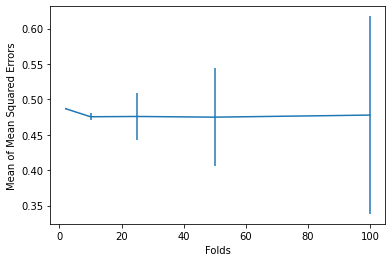

In [19]:
plt.errorbar(folds, foldsErrMean, foldsErrVar)
plt.xlabel("Folds") ; plt.ylabel("Mean of Mean Squared Errors")

When we increase the number of folds, we use a smaller portion of the data as test data within the folds (size of fold is data_points/k).   
   
When we have a small fold of data for testing, and we choose multiple different folds for testing, the chances that two different test folds generate a different mean square error from each other is increased the smaller the test sample due to noise.    
  
We see that the mean of the mean squared error stays the same across fold sizes, this is because even though the variance is large, it still averages out to about the same mean square error.   
   
Having a big size for k also increased number of times needed to compute the model (k times, as we are effectively fitting to k different datasets)   
   
We also want to use as much data as possible to train the model.   
   
From this graph I would choose 10 folds as its seems the Mean Mean Square Error stabilizes while also not much variance is created.   
   
Also considering the amount of data points available we have, its leaning towards the greedy side (in terms of leaving less for testing data). (k is usually either 5 or 10)

#### (b)

Same function is but with this time C is varied, the results are appended to an array and then plotted.

Text(0, 0.5, 'Mean of Mean Squared Errors')

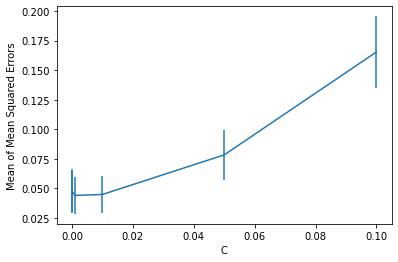

In [20]:
C_values = [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1]
cErrMean = []
csErrStd = []
for C in C_values:
    mean, var, std = kfoldMeanVar(10, C, silent=True)
    cErrMean.append(mean)
    csErrStd.append(std)
    
plt.errorbar(C_values, cErrMean, csErrStd)
plt.xlabel("C") ; plt.ylabel("Mean of Mean Squared Errors")

The maximum value of C=0.1 is chosen to be graphed as at 0.1 it is when Lasso model is  clearly underfitting the data judging by the plane plot in the previous question.  
  
If I went with an extra C=1 value, then the C<=0.01 would be impossible to distinguish as the error would be so high on C=1 and the plot would be zoomed out.   
   
I left C=0.1 in even though it is clearly underfitting as I like to use it as a borderline for when C goes from model thats not working to simplest model thats working.   
   
I also included a C=0.05 to avoid having matplotlib interpolating such a big distance.  
   
I went with an extreme min value to see how the standard deviation would change as to indicate when the model would be overfitting.

#### (c)

I would recommend a value of C=0.01.    
   
This is because it seems like it is the simplest the model can be while keeping a good performance.   
   
There's no reason to choose smaller as the Mean Mean Square Error stays the same, there would be no point risking an overfitted model for no improvement on the Mean Square Error.   
   
You could maybe pick a higher C value but it seems like a higher value of C is moving fast towards underfitting.

#### (d)

Same function is used, but now with Ridge regression.

Text(0, 0.5, 'Mean of Mean Squared Errors')

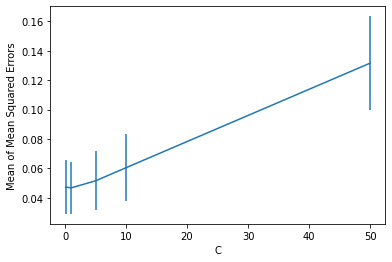

In [21]:
C_values = [0.1, 1, 5, 10, 50]
cErrMean = []
csErrStd = []
for C in C_values:
    mean, var, std = kfoldMeanVar(10, C, silent=True, m="Ridge")
    cErrMean.append(mean)
    csErrStd.append(std)
    
plt.errorbar(C_values, cErrMean, csErrStd)
plt.xlabel("C") ; plt.ylabel("Mean of Mean Squared Errors")

Since the nature of the L2 penalty is such that it becomes more influencial at C>=1, the range of C values is effectively scaled up.   
   
For ridge regression I would pick a value of C=5 as it seems close enough to the minimal Mean Square Error without going close to the territory where it would overfit to the noise.